# Part 1

# Decomposition/Factorization

Why is it useful to express something as a few parts multiplied together?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.random.uniform(0.1,5,100)
noise = np.random.normal(scale=0.3, size=x.size)

In [2]:
# at what points does y=0?
#y = -x**3 + 7*x**2 - 14*x + 8
y = (4-x) * (2-x) * (1-x)

In [3]:
df = pd.DataFrame({"x":x, "y":y+noise})
df.head()

,x,y
0,0.689491,0.994394
1,0.235114,4.889531
2,3.531182,1.532703
3,1.857699,-0.340180
4,1.730512,-0.223934


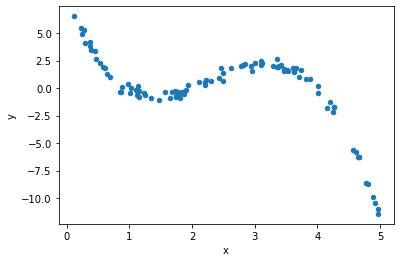

In [4]:
df.plot.scatter(x="x", y="y")

# Matrix Sizes

In [5]:
A = np.random.normal(size=(4, 7))
B = np.random.normal(size=(7, 14))
C = np.random.normal(size=(14, 3))
D = np.random.normal(size=(3, 6))
print(A.shape, B.shape, C.shape, D.shape)
print((A @ B @ C @ D).shape)
pd.DataFrame(A @ B @ C @ D)

(4, 7) (7, 14) (14, 3) (3, 6)
(4, 6)


,0,1,2,3,4,5
0,-15.685684,4.303960,-16.475137,-11.866007,13.615633,13.637724
1,-8.508188,-1.168117,10.451557,4.046180,5.449067,3.015051
2,-3.875872,-33.282016,-15.913233,-13.270516,-2.209710,3.332144
3,-9.094866,-24.057206,31.216773,13.092923,0.269586,-2.735240


# Singular Value Decomposition

In [6]:
import string

In [7]:
df = pd.DataFrame(np.arange(80.0).reshape(8, 10), 
                  columns=list(string.ascii_uppercase[:10]))
df

,A,B,C,D,E,F,G,H,I,J
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
1,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
2,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
3,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0
4,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0
5,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0
6,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0
7,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0


In [8]:
u, s, vh = np.linalg.svd(df, full_matrices=False)

In [9]:
pd.DataFrame((u * s) @ vh, columns=df.columns).round(2)

,A,B,C,D,E,F,G,H,I,J
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
1,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
2,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
3,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0
4,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0
5,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0
6,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0
7,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0


# Part 2: Compressed File

In [10]:
df = pd.DataFrame(np.arange(8000.0).reshape(800, 10), 
                  columns=list(string.ascii_uppercase[:10]))
df

,A,B,C,D,E,F,G,H,I,J
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
1,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
2,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
3,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0
4,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0
...,...,...,...,...,...,...,...,...,...,...
795,7950.0,7951.0,7952.0,7953.0,7954.0,7955.0,7956.0,7957.0,7958.0,7959.0
796,7960.0,7961.0,7962.0,7963.0,7964.0,7965.0,7966.0,7967.0,7968.0,7969.0
797,7970.0,7971.0,7972.0,7973.0,7974.0,7975.0,7976.0,7977.0,7978.0,7979.0
798,7980.0,7981.0,7982.0,7983.0,7984.0,7985.0,7986.0,7987.0,7988.0,7989.0


In [11]:
u, s, vh = np.linalg.svd(df, full_matrices=False)
importance = s
data = u * s
key = vh

In [12]:
(s / s.sum()).round(2)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
data_df = pd.DataFrame(data[:, :2]).round(2)
data_df

,0,1
0,-14.24,9.08
1,-45.86,9.06
2,-77.48,9.04
3,-109.10,9.02
4,-140.73,9.01
...,...,...
795,-25154.34,-4.46
796,-25185.96,-4.48
797,-25217.58,-4.50
798,-25249.21,-4.52


In [14]:
key_df = pd.DataFrame(key[:2, :])
key_df

,0,1,2,3,4,5,6,7,8,9
0,-0.315961,-0.316020,-0.316079,-0.316139,-0.316198,-0.316257,-0.316317,-0.316376,-0.316435,-0.316495
1,-0.495604,-0.385508,-0.275411,-0.165315,-0.055218,0.054878,0.164974,0.275071,0.385167,0.495263


In [15]:
(data_df @ key_df).round(2)

,0,1,2,3,4,5,6,7,8,9
0,-0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
1,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
2,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
3,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0
4,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0
...,...,...,...,...,...,...,...,...,...,...
795,7950.0,7951.0,7952.0,7953.0,7954.0,7955.0,7956.0,7957.0,7958.0,7959.0
796,7960.0,7961.0,7962.0,7963.0,7964.0,7965.0,7966.0,7967.0,7968.0,7969.0
797,7970.0,7971.0,7972.0,7973.0,7974.0,7975.0,7976.0,7977.0,7978.0,7979.0
798,7980.0,7981.0,7982.0,7983.0,7984.0,7985.0,7986.0,7987.0,7988.0,7989.0


In [16]:
with open("orig.npz", "wb") as f:
    np.savez(f, list(df.columns), df.values)

In [17]:
with open("compressed.npz", "wb") as f:
    np.savez(f, list(df.columns), data_df.values, key_df.values)

In [18]:
! ls -lah

total 208K
drwxrwxr-x 3 trh trh 4.0K Oct 29 20:09 .
drwxrwxr-x 9 trh trh 4.0K Oct 29 18:36 ..
drwxrwxr-x 2 trh trh 4.0K Oct 29 19:47 .ipynb_checkpoints
-rw-rw-r-- 1 trh trh  21K Oct 29 18:36 Untitled.ipynb
-rw-rw-r-- 1 trh trh  14K Oct 29 21:19 compressed.npz
-rw-rw-r-- 1 trh trh  24K Oct 29 18:36 demo.ipynb
-rw-rw-r-- 1 trh trh  64K Oct 29 21:19 orig.npz
-rw-rw-r-- 1 trh trh  17K Oct 29 18:36 part2.ipynb
-rw-rw-r-- 1 trh trh  21K Oct 29 18:36 part3.ipynb
-rw-rw-r-- 1 trh trh  22K Oct 29 18:36 part4.ipynb


In [19]:
with np.load("compressed.npz") as d:
    cols, data, key = d.values()
    
pd.DataFrame(data @ key, columns=cols).round(2)

,A,B,C,D,E,F,G,H,I,J
0,-0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
1,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
2,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
3,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0
4,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0
...,...,...,...,...,...,...,...,...,...,...
795,7950.0,7951.0,7952.0,7953.0,7954.0,7955.0,7956.0,7957.0,7958.0,7959.0
796,7960.0,7961.0,7962.0,7963.0,7964.0,7965.0,7966.0,7967.0,7968.0,7969.0
797,7970.0,7971.0,7972.0,7973.0,7974.0,7975.0,7976.0,7977.0,7978.0,7979.0
798,7980.0,7981.0,7982.0,7983.0,7984.0,7985.0,7986.0,7987.0,7988.0,7989.0


In [20]:
df.head()

,A,B,C,D,E,F,G,H,I,J
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
1,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
2,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
3,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0
4,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0


In [21]:
data_df.head()

,0,1
0,-14.24,9.08
1,-45.86,9.06
2,-77.48,9.04
3,-109.10,9.02
4,-140.73,9.01


# Part 3: PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
df = pd.DataFrame(np.arange(200).reshape(-1,10),
             columns=list("ABCDEFGHIJ"))
df1 = df.iloc[:10]
df2 = df.iloc[10:]

In [24]:
pca = PCA(n_components=0.9)
pca.fit(df1) # components (key for interpreting the new data)
key_df = pd.DataFrame(pca.components_)
key_df

,0,1,2,3,4,5,6,7,8,9
0,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228


In [25]:
arr = pca.transform(df1) # gives us the reduced data
data1_df = pd.DataFrame(arr)
data1_df

,0
0,142.302495
1,110.679718
2,79.056942
3,47.434165
4,15.811388
5,-15.811388
6,-47.434165
7,-79.056942
8,-110.679718
9,-142.302495


In [28]:
data1_df = pd.DataFrame(pca.fit_transform(df1))
key_df = pd.DataFrame(pca.components_)

In [30]:
data2_df = pd.DataFrame(pca.fit_transform(df2))
pd.DataFrame(data2_df.values @ key_df.values + pca.mean_)

,0,1,2,3,4,5,6,7,8,9
0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0
1,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0
2,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0
3,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0
4,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0
5,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0
6,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0
7,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0
8,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0
9,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0


In [36]:
df3 = pd.DataFrame(np.zeros((3,10)))
df3.iloc[0] = 100
df3.iloc[1] = -10
df3.iloc[2] = np.arange(10) + 5
df3

,0,1,2,3,4,5,6,7,8,9
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0
2,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0


In [39]:
data3 = pca.transform(df3)
pd.DataFrame(data3 @ key_df.values + pca.mean_)

,0,1,2,3,4,5,6,7,8,9
0,95.5,96.5,97.5,98.5,99.5,100.5,101.5,102.5,103.5,104.5
1,-14.5,-13.5,-12.5,-11.5,-10.5,-9.5,-8.5,-7.5,-6.5,-5.5
2,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0


In [26]:
rebuilt_df = pd.DataFrame(data1_df.values @ key_df.values + pca.mean_)
rebuilt_df.round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
1,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
2,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
3,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0
4,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0
5,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0
6,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0
7,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0
8,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0
9,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0


In [27]:
pca.explained_variance_ratio_.round(2)

array([1.])